In [18]:
#В наборах данных содержатся транзакции, совершенные держателями 
#европейских карт с помощью кредитных карт в сентябре 2013 года. 
#В этом наборе данных представлены транзакции 
#c 492 мошенничествами из 284 807 транзакций. 
#Набор данных сильно несбалансирован, на позитивный класс (мошенничество) 
#приходится 0,172% всех транзакций.

#Он содержит только числовые входные переменные, 
#которые являются результатом преобразования PCA.

#Из-за проблем с конфиденциальностью исходные функции и 
#дополнительная справочная информация о данных не представлены.

#Признаки V1, V2, ... V28 являются основными компонентами, 
#полученными с помощью PCA;
#Единственные признаки, которые не были преобразованы с помощью PCA, 
#- это Time и Amount. Time - секунды, прошедшие между каждой транзакцией 
#и первой транзакцией в наборе данных. 
#Amount - это сумма транзакции

In [8]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

In [10]:
df = pd.read_csv("creditcard.csv")

In [11]:
df.shape

(284807, 31)

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
#Посмотрим на дисбаланс классов
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [44]:
#Обратим внимание на распределение времени для обоих классов
df["Hour"] = df["Time"].apply(lambda x: np.floor(x / 3600))
tmp = df.groupby(["Hour", "Class"])["Amount"].aggregate(["min", "max", 
                "count", "sum","mean", "median", "var"]).reset_index()
d = pd.DataFrame(tmp)
d.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 
            'Median', 'Var']
d.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


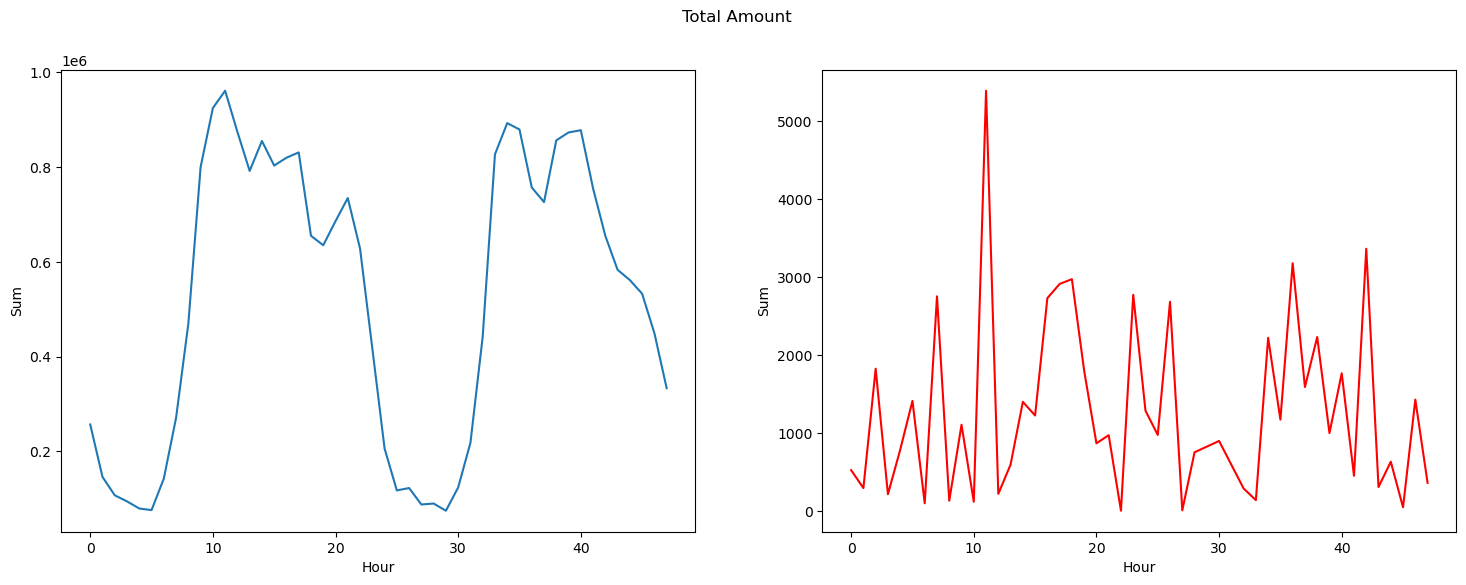

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=d.loc[d.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=d.loc[d.Class==1], 
                 color="red")
plt.suptitle("Total Amount")
plt.show()

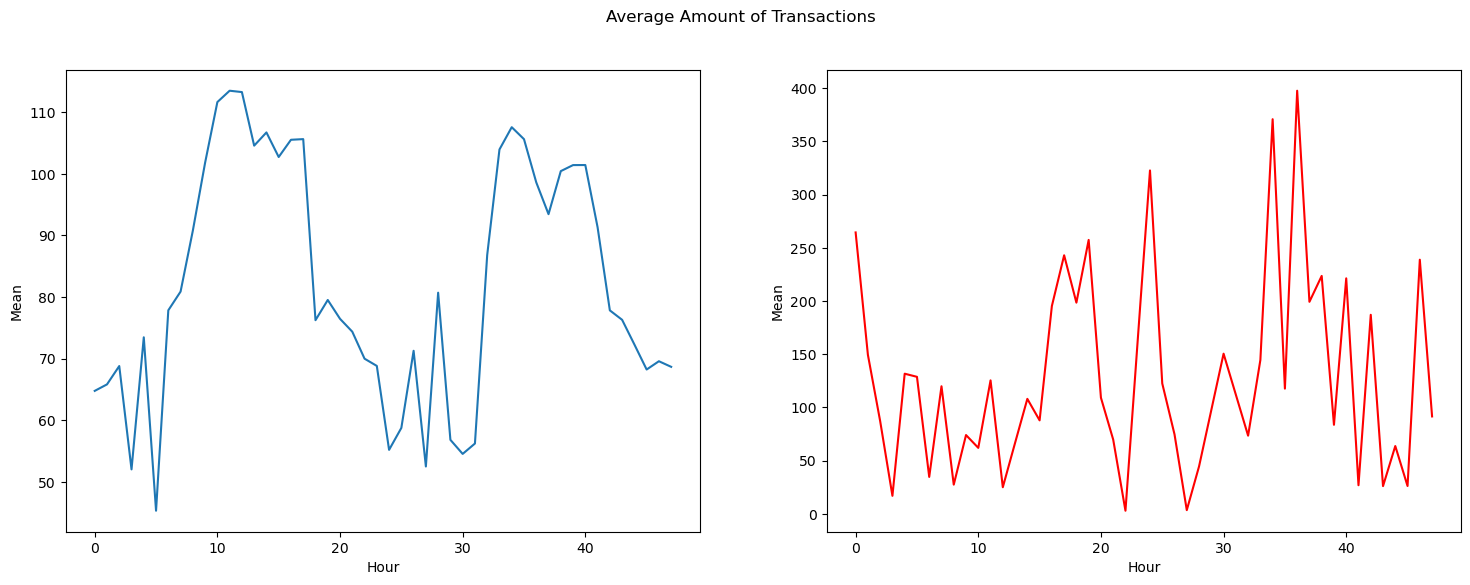

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=d.loc[d.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=d.loc[d.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show()

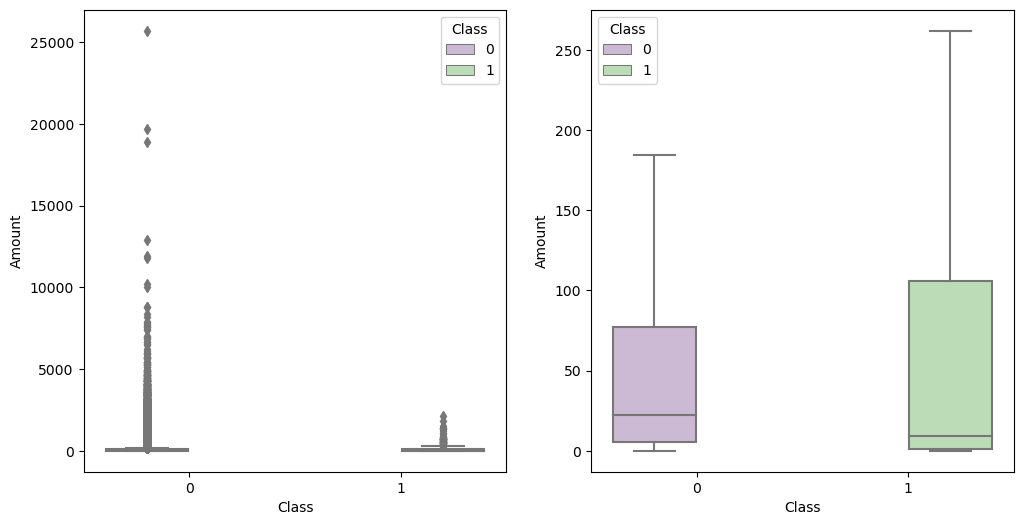

In [50]:
#Количество транзакций
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show()

In [51]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [52]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [53]:
#Реальные транзакции имеют большее среднее значение, больший Q1, 
#меньшие Q3 и Q4 и большие выбросы; мошеннические транзакции имеют 
#меньшее Q1 и среднее значение, больший Q4 и меньшие выбросы.

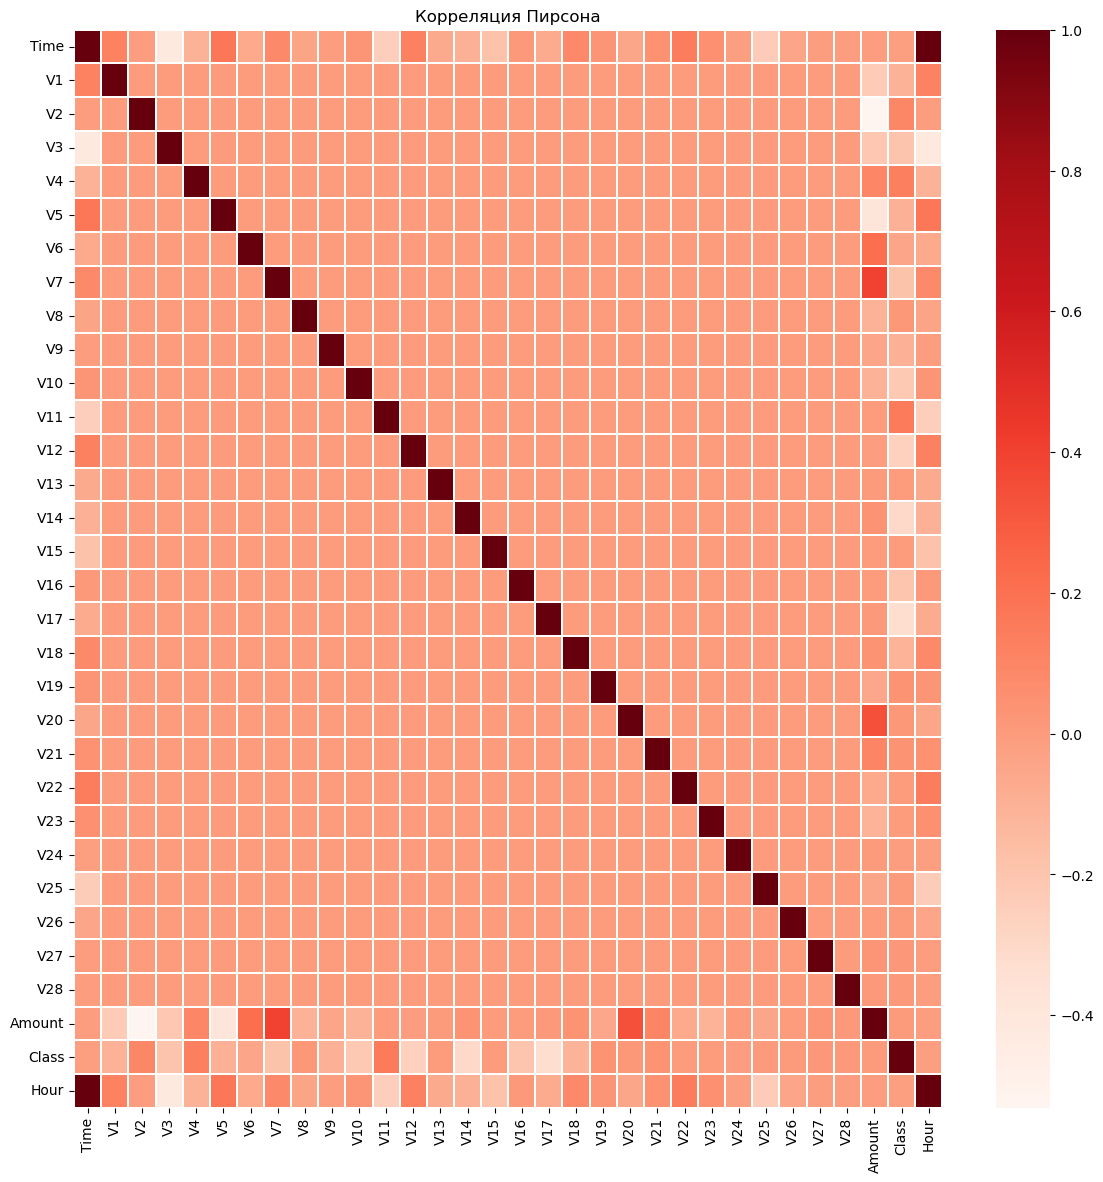

In [55]:
#Посмотрим на корреляцию признаков
plt.figure(figsize = (14,14))
plt.title('Корреляция Пирсона')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

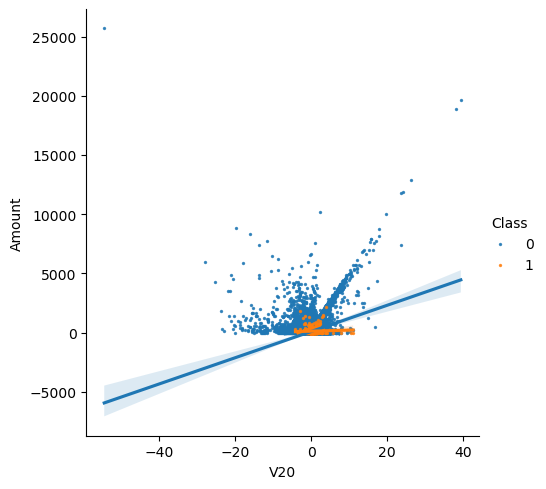

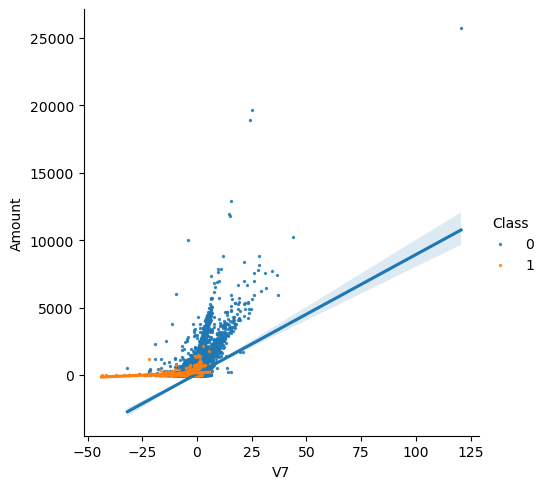

In [57]:
#Как и ожидалось, заметной корреляции между признаками V1-V28 нет. 
#Есть определенные корреляции между некоторыми из этих признаков и 
#временем (обратная корреляция с V3) и количеством 
#(прямая корреляция с V7 и V20, обратная корреляция с V1 и V5).

#Построим коррелированные и обратнокоррелированные значения 
#на одном графике.
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', 
               fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', 
               fit_reg=True,scatter_kws={'s':2})
plt.show()

In [58]:
#Мы можем подтвердить, что две пары признаков имеют обратную корреляцию 
#(линии регрессии для класса = 0 имеют отрицательный наклон, 
#в то время как линии регрессии для класса = 1 имеют очень небольшой 
#отрицательный наклон).

In [64]:
#Разбиваем данные на тестовую, тренировочную и валидационную выборку
train_df, test_df = train_test_split(df, test_size=0.2, random_state=2018, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=2018, shuffle=True )

In [62]:
#обучим случайный лес на 100 деревьях
clf = RandomForestClassifier(n_jobs=-1, random_state=2018, criterion="gini",
                            n_estimators=100, verbose=False)

In [66]:
clf.fit(train_df.drop("Class", axis=1), train_df["Class"].values)

RandomForestClassifier(n_jobs=-1, random_state=2018, verbose=False)

In [67]:
pred = clf.predict(valid_df.drop("Class", axis=1))

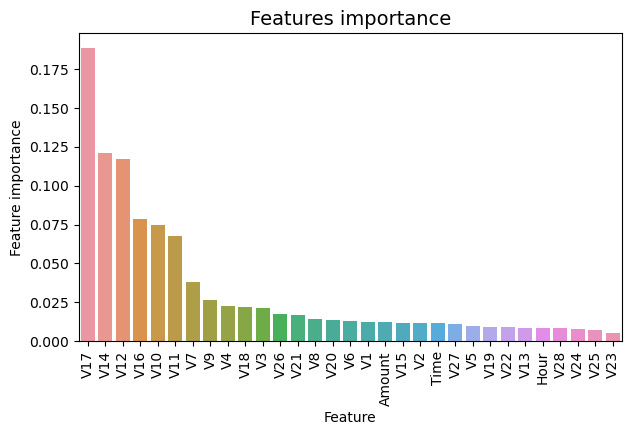

In [69]:
#Посмотрим на важность признаков
tmp = pd.DataFrame({'Feature': df.drop("Class", axis=1).columns, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [70]:
#значение ROC_AUC на случайном лесе
roc_auc_score(valid_df["Class"].values, pred)

0.8528751945496347

In [71]:
#AdaBoostClassifier
clf = AdaBoostClassifier(random_state=2018,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)
clf.fit(train_df.drop("Class", axis=1), train_df["Class"].values)

C:\Users\Alexg\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [72]:
pred = clf.predict(valid_df.drop("Class", axis=1))

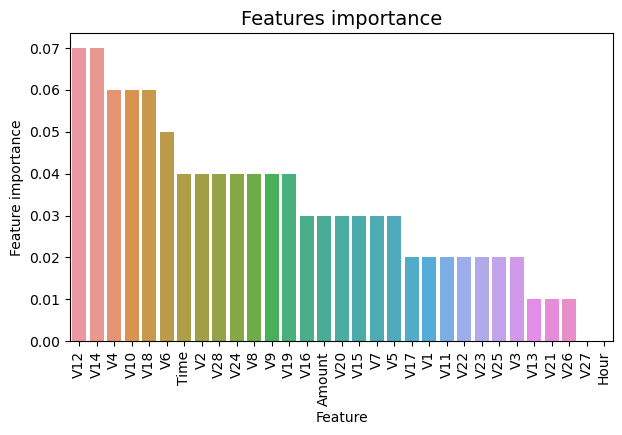

In [73]:
tmp = pd.DataFrame({'Feature': df.drop("Class", axis=1).columns, 
                    'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [76]:
#Значение ROC_AUC для AdaBoost
roc_auc_score(valid_df["Class"].values, pred)

0.8332343604519027

In [77]:
#CatBoostClassifier
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 2018,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

In [78]:
clf.fit(train_df.drop("Class", axis=1), train_df["Class"].values,verbose=True)

0:	total: 615ms	remaining: 5m 6s
50:	total: 19.6s	remaining: 2m 52s
100:	total: 37.5s	remaining: 2m 28s
150:	total: 55s	remaining: 2m 7s
200:	total: 1m 16s	remaining: 1m 53s
250:	total: 1m 38s	remaining: 1m 37s
300:	total: 2m	remaining: 1m 19s
350:	total: 2m 22s	remaining: 1m
400:	total: 2m 42s	remaining: 40.2s
450:	total: 3m 4s	remaining: 20s
499:	total: 3m 25s	remaining: 0us


In [79]:
pred = clf.predict(valid_df.drop("Class", axis=1))

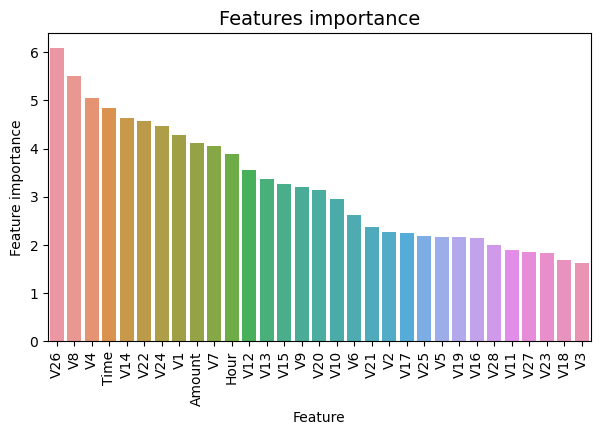

In [80]:
tmp = pd.DataFrame({'Feature': df.drop("Class", axis=1).columns, 
                    'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [81]:
#Значение ROC_AUC для CatBoost
roc_auc_score(valid_df["Class"].values, pred)

0.857788152320774

In [82]:
#XGBoost
dtrain = xgb.DMatrix(train_df.drop("Class", axis=1), train_df["Class"].values)
dvalid = xgb.DMatrix(valid_df.drop("Class", axis=1), valid_df["Class"].values)
dtest = xgb.DMatrix(test_df.drop("Class", axis=1), test_df["Class"].values)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 2018

In [83]:
model = xgb.train(params, 
                dtrain, 
                1000, 
                watchlist, 
                early_stopping_rounds=50, 
                maximize=True, 
                verbose_eval=50)

C:\Users\Alexg\anaconda3\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
C:\Users\Alexg\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [23:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.94070	valid-auc:0.88630
[50]	train-auc:0.94061	valid-auc:0.89075
[100]	train-auc:0.97409	valid-auc:0.96256
[150]	train-auc:0.98527	valid-auc:0.98068
[200]	train-auc:0.99273	valid-auc:0.98560
[250]	train-auc:0.99503	valid-auc:0.98412
[261]	train-auc:0.99543	valid-auc:0.98396


In [84]:
#Лучший показатель ROC_AUC 0.987

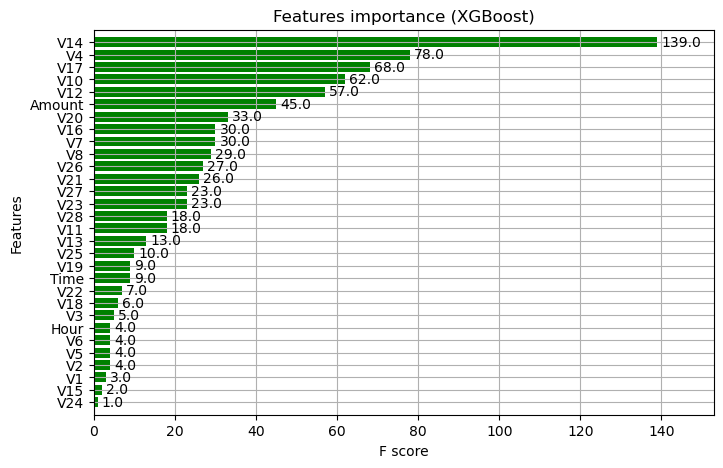

In [86]:
#Посмотрим на важность признаков
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [87]:
pred = model.predict(dtest)

In [88]:
roc_auc_score(test_df["Class"].values, pred)

0.9784017445745841

In [89]:
#AUC на тестовой выборке получился  0.978

In [90]:
#LightGBM
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  
          'max_depth': 4,  
          'min_child_samples': 100,  
          'max_bin': 100,  
          'subsample': 0.9,  
          'subsample_freq': 1, 
          'colsample_bytree': 0.7,  
          'min_child_weight': 0,  
          'min_split_gain': 0,   
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # Устанавливаем такое значение,  
         }                        #так как классы несбалансированы

In [104]:
predictors = (df.drop("Class", axis=1).columns).tolist()
dtrain = lgb.Dataset(train_df.drop("Class", axis=1).values, 
                     label=train_df["Class"].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df.drop("Class", axis=1).values,
                     label=valid_df["Class"].values,
                     feature_name=predictors)

In [108]:
model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'],
                  num_boost_round=100
                  )

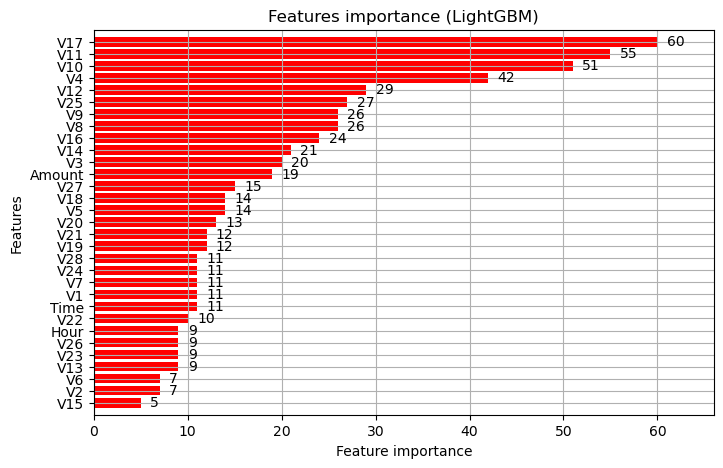

In [109]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

In [110]:
pred = model.predict(test_df[predictors])

In [113]:
roc_auc_score(test_df["Class"].values, pred)

0.9128986845344871

In [114]:
#Заключение

Для RandomForest значение ROC_AUC получилось 0.85

Значение ROC_AUC для AdaBoost получилось чуть меньше: 0.83

Значение ROC_AUC для CatBoost: 0.85

Далее, на модели XGBoost получилось значение ROC_AUC 0.978

LightGBM выдал значение ROC_AUC 0.91